## Canvas to Viewport

If $Cx$ and $C_y$ are canvas coordinates and $C_w$ and $C_h$ are canvas dimensions,
then for each pixel on the canvas, we can determine its corresponding point on
the viewport $V$
</br>
$Vx = Cx \cdot \frac{V_w}{C_w}$
$Vy = Cy \cdot \frac{V_h}{C_h}$
</br>
Although the viewport is 2D, it’s embedded in3D space. We defined it to be at a
distance d from the camera; every point in this plane (called the projection plane)
has, by definition, $z = d$. Therefore, $V_z = d$
</br>
</br>

## The Ray Equation
The most convenient way to represent a ray for our purposes is with a parametric
equation. We know the ray passes through $O$, and we know its direction
(from $O$ to $V$), so we can express any point $P$ in the ray as
<br/>
$P = O + t(V – O)$
<br/>
where $t$ is any real number. By plugging every value of t from –1 to +1into
this equation, we get every point $P$ along the ray.
Let’s call $(V – O)$, the direction of the ray, $\vec{D}$. The equation becomes
<br/>
$P = O + t\vec{D}$

<br />

## One Way Ray Tracing

We can define the plane equation using the Cartesian form:
$ax + by + cz = d$
where the normal vector n is given by
n = a**i** + b**j** + c**k**

Then we can find $d$ using,
$n \cdot p = d$

$p$ is a point on the plane
<br />

![ray tracing problem](ray-tracing.png "One Way Ray Tracing Problem")

<br />

1. Origin is at (0,0,0),
2. $ P_1(x, y, z) $ is a point where the ray intersects the first plane,
3. $ P_0 (0,0,-1) $ is the light source and a point on the ray,
4. $ n $ is the plane's normal vector which can be calculated as cross product
of any two vectors on the first plane,
5. $ t $ is $P_0$'s position vector: $(P_0 - origin)$,
6. $ v $ is the direction vector of the ray \frac{P_1-P_0}{|P_1-P_0|},
7. $ p = t + λv $ is the equation of the ray, where
p is the position vector for $P_1$


In [47]:
from scipy.spatial.transform import Rotation as R
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def unit_vector(vector):
    '''
    :param vector: Any vector as numpy array
    :return: unit vector
    '''
    return vector / np.linalg.norm(vector)

In [49]:
def angle_between(v1, v2):
    '''
    :param v1: first vector
    :param v2: second vector
    :return: angle between the two vectors
    '''
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [50]:
def get_direction(p1, p2):
    '''
    :param p1: first point
    :param p2: second point
    :return: direction vector
    '''
    direction = (p1-p2)/np.linalg.norm(p1-p2)
    return  direction

In [51]:
def rotate(origin, point, angle):
    '''
    :param origin: start point the vector
    :param point: end point to be rotated
    :param angle: positive angle for counterclockwise direction
    :return: rotated vector by the provided angle
    '''
    ox, oy = origin
    px, py = point

    qx = oy + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

In [52]:
source = np.array([0, 0, -1]) # light source
origin = np.array([0, 0, 0])
# origin (0, -1, -1) -> plane_1_centre -> plane_2_centre -> object (0, 1, 1) => 2 units length
plane_1_z = -1+2/3 # source and plane_1 are 0.33 unit apart
plane_2_z = -1+4/3 # source and plane_2 are 0.66 unit apart
object_z = 1 # source and object are 1 unit apart

In [53]:
plane = np.mgrid[1:-1:100j, 1:-1:100j] # mesh grid with 100X100 dimension
plane = plane.transpose(1,2,0)
plane

array([[[ 1.        ,  1.        ],
        [ 1.        ,  0.97979798],
        [ 1.        ,  0.95959596],
        ...,
        [ 1.        , -0.95959596],
        [ 1.        , -0.97979798],
        [ 1.        , -1.        ]],

       [[ 0.97979798,  1.        ],
        [ 0.97979798,  0.97979798],
        [ 0.97979798,  0.95959596],
        ...,
        [ 0.97979798, -0.95959596],
        [ 0.97979798, -0.97979798],
        [ 0.97979798, -1.        ]],

       [[ 0.95959596,  1.        ],
        [ 0.95959596,  0.97979798],
        [ 0.95959596,  0.95959596],
        ...,
        [ 0.95959596, -0.95959596],
        [ 0.95959596, -0.97979798],
        [ 0.95959596, -1.        ]],

       ...,

       [[-0.95959596,  1.        ],
        [-0.95959596,  0.97979798],
        [-0.95959596,  0.95959596],
        ...,
        [-0.95959596, -0.95959596],
        [-0.95959596, -0.97979798],
        [-0.95959596, -1.        ]],

       [[-0.97979798,  1.        ],
        [-0.97979798,  0.97

In [54]:
# test for first line segment along the ray
plane_1_centre = np.array([0, 0, plane_1_z])
point_1 = np.array([1, 1, plane_1_z]) # point on the first plane
point_2 = np.array([1, 0.5, plane_1_z]) # another point on the same plane
n1 = np.cross((point_1-plane_1_centre), (point_2-plane_1_centre)) # plane normal
n1

array([ 0. ,  0. , -0.5])

In [55]:
d1 = np.dot(n1, point_1)
d1

0.16666666666666669

In [56]:
'''
The equation of the plane is ax + by + cz = d
'''
a1, b1, c1 = n1
print('The equation of plane-1 is {0}x + {1}y + {2}z = {3}'.format(a1, b1, c1, d1))

The equation of plane-1 is 0.0x + 0.0y + -0.5z = 0.16666666666666669


In [57]:
# position vector at P_1
p = point_1 - origin
p

array([ 1.        ,  1.        , -0.33333333])

In [58]:
# position vector at P_0 (source)
t = source - origin
t

array([ 0,  0, -1])

In [59]:
# direction vector of the ray
v = get_direction(point_1, source)
v

array([0.63960215, 0.63960215, 0.42640143])

In [60]:
# λ = (p-t)/v from 7 (see above)
_lambda = (p-t)/v
_lambda

array([1.56347192, 1.56347192, 1.56347192])

In [61]:
# verify if point_1
t+_lambda*v == point_1

array([ True,  True,  True])

In [62]:
# plane_2
plane_2_centre = np.array([0, 0, plane_2_z])
point_3 = np.array([1, 1, plane_2_z]) # any point on the second plane
point_4 = np.array([1, 0.5, plane_2_z]) # another point on the same plane
n2 = np.cross((point_3-plane_2_centre), (point_4-plane_2_centre)) # plane-2 normal
n2

array([ 0. ,  0. , -0.5])

In [63]:
d2 = np.dot(n2, point_3)
d2

-0.16666666666666663

In [64]:
'''
The equation of the plane is ax + by + cz = d
'''
a2, b2, c2 = n2
print('The equation of plane-2 is {0}x + {1}y + {2}z = {3}'.format(a2, b2, c2, d2))

The equation of plane-2 is 0.0x + 0.0y + -0.5z = -0.16666666666666663


In [65]:
'''
If line segment 1 is extended beyond plane_1, it will eventually intersect plane_2
z coordinates are known
As, distance from source and plane_1 equals to the distance from plane_1 and plane_2,
x and y coordinates can be calculated as follows
(x0+x2)/2=x1, where x1 is the middle point between x0 and x2
x2 = 2x1-x0
similarly, y2 = 2y1-y0
'''
x = 2*point_1[0] - source[0]
y = 2*point_1[1] - source[1]
z = plane_2_z

intersection_on_plane_2 = np.array([x, y, z])
intersection_on_plane_2

array([2.        , 2.        , 0.33333333])

In [66]:
'''
Verify if the found point satisfies the plane_2 equation
'''
np.around(a2*x+b2*y+c2*z, 3) == np.around(d2, 3)

True

In [67]:
'''
Verify if the plane-1-intersection and plane-2-intersection are on the same line segment
'''
np.degrees(np.around(angle_between((source-point_1), (source-intersection_on_plane_2)), 3))

0.0

In [68]:
'''
However, the plane_1 rotates the ray by 10 degrees in clockwise direction
So after rotation the actual intersection point will be
'''
rot_x, rot_y = rotate((point_1[0], point_1[1]), (x, y), np.radians(-10))
rotated_point = np.array([rot_x, rot_y, plane_2_z])
rotated_point

array([2.15845593, 1.81115958, 0.33333333])

In [69]:
'''
check if the new point is on the same plane
'''
np.around(a2*rot_x+b2*rot_y+c2*z, 3) == np.around(d2, 3)

True

In [70]:
'''
check if the angle between original vector and rotated vector is 10 degress
'''
np.degrees(angle_between(intersection_on_plane_2-point_1, rotated_point-point_1))

9.043247867929551

In [71]:
'''
check if scipy Rotation is better
'''
r = R.from_euler('z', 10, degrees=True)
original_vec = intersection_on_plane_2-point_1
rotated_vec = r.apply(original_vec)
np.degrees(angle_between(original_vec, rotated_point-point_1))

9.043247867929551

In [72]:
'''
Find all the rays that intersects plane-1, plane-2 and the object
'''
plane_1_intersects = []
plane_2_intersects = []
object_intersects = []

for row in plane:
    for col in row:
        point_on_plane_1 = np.array([col[0], col[1], plane_1_z]) # plane_1_z = -0.33
        # if we extend the line segment to plane-2 we will find line_plane_intersects
        x2 = 2 * point_on_plane_1[0] - source[0]
        y2 = 2 * point_on_plane_1[1] - source[1]
        z2 = plane_2_z
        # this line_plane_intersect is rotated by 10 degrees in clockwise direction
        rot_x, rot_y = rotate((point_on_plane_1[0], point_on_plane_1[1]), (x2, y2), np.radians(-10))
        rotated_point = np.array([rot_x, rot_y, plane_2_z])
        # check if the point falls within limit
        if -1 <= rot_y <= 1:
            # if we extend the line-segment further it might fall on the object
            x3 = rot_x + (rot_x - source[0])
            y3 = rot_y + (rot_y - source[1])
            z3 = object_z
            # this line_object_intersect is rotated by 10 degrees in clockwise direction
            obj_x, obj_y = rotate((rot_x, rot_y), (x3, y3), np.radians(-10))
            obj_point = np.array([obj_x, obj_y, object_z])
            # check if the new coordinates coincides with the object
            if (-0.05 <= obj_x <= 0.05) and (-0.05 <= obj_y <= 0.05):
                # accept all the points on this path
                plane_1_intersects.append([point_on_plane_1[0], point_on_plane_1[1], point_on_plane_1[2]])
                plane_2_intersects.append([rot_x, rot_y, plane_2_z])
                object_intersects.append([obj_x, obj_y, object_z])


print(len(plane_1_intersects))
print(len(plane_2_intersects))
print(len(object_intersects))

4
4
4


In [73]:
object_intersects

[[0.042942709799353274, 0.032525167961119, 1],
 [-0.027467064483818818, -0.04294270979935369, 1],
 [0.027467064483818346, 0.04294270979935333, 1],
 [-0.042942709799353745, -0.03252516796111935, 1]]

C:\Users\dipanjan\AppData\Local\Temp/ipykernel_17388/2339738825.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


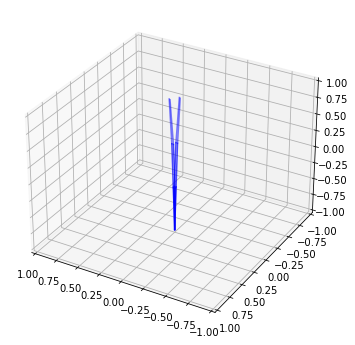

In [74]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111, projection='3d')

plt.xlim([1, -1])
plt.ylim([1, -1])


for i in range(len(plane_1_intersects)):
    ax.plot([source[0], plane_1_intersects[i][0]],
            [source[1], plane_1_intersects[i][1]],
            [source[2], plane_1_intersects[i][2]],
            color='blue',
            alpha=0.9)

for i in range(len(plane_2_intersects)):
    ax.plot([plane_1_intersects[i][0], plane_2_intersects[i][0]],
            [plane_1_intersects[i][1], plane_2_intersects[i][1]],
            [plane_1_intersects[i][2], plane_2_intersects[i][2]],
            color='blue',
            alpha=0.7)

for i in range(len(object_intersects)):
    ax.plot([plane_2_intersects[i][0], object_intersects[i][0]],
            [plane_2_intersects[i][1], object_intersects[i][1]],
            [plane_2_intersects[i][2], object_intersects[i][2]],
            color='blue',
            alpha=0.5)

fig.show()

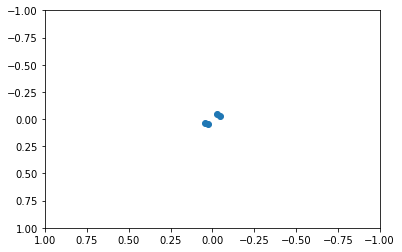

In [75]:
# test
X = []
Y = []
for point in object_intersects:
    X.append(point[0])
    Y.append(point[1])

plt.xlim([1, -1])
plt.ylim([1, -1])

plt.scatter(X, Y)